In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression

In [41]:
data = pd.read_csv('Dados - ProjetoSociologia.csv')

data.shape

(70, 6)

In [42]:
data.head()

,Carimbo de data/hora,A sola do seu tênis suja muito quando você sai de casa?,Você costuma lavar o seu tênis?,Você anda em casa com o tênis calçado?,Qual tipo de tênis você mais usa?,Você compraria um tênis com solas trocáveis?
0,2021/11/16 12:17:48 AM GMT-3,Sim,Sim,Não,Casual,Sim
1,2021/11/16 12:18:11 AM GMT-3,Sim,Não,Não,Casual,Sim
2,2021/11/16 12:18:31 AM GMT-3,Sim,Sim,Sim,Casual,Não
3,2021/11/16 12:18:51 AM GMT-3,Sim,Não,Não,Casual,Não
4,2021/11/16 12:19:06 AM GMT-3,Sim,Não,Não,Esportivo,Sim


In [43]:
data.columns = ['apagar' ,'DirtyShoes', 'WashShoes', 'ShoesAtHome', 'ShoesType', 'BuySustShoes']

In [44]:
data = data.drop(['apagar'], axis=1)

In [45]:
dirty_shoes = data.groupby(['DirtyShoes']).size()
wash_shoes = data.groupby(['WashShoes']).size()
shoes_at_home = data.groupby(['ShoesAtHome']).size()
shoes_type = data.groupby(['ShoesType']).size()
buy_shoes = data.groupby(['BuySustShoes']).size()

print(f'''
Pessoas que sujam muito o tenis:\n {dirty_shoes}\n
Pessoas que costuma lavar o tenis:\n {wash_shoes}\n
Pessoas que usam tenis em casa:\n {shoes_at_home}\n
Preferencia do tipo de tenis:\n {shoes_type}\n
Pessoas que comprariam o tenis:\n {buy_shoes}
''')


Pessoas que sujam muito o tenis:
 DirtyShoes
Não    20
Sim    50
dtype: int64

Pessoas que costuma lavar o tenis:
 WashShoes
Não    15
Sim    55
dtype: int64

Pessoas que usam tenis em casa:
 ShoesAtHome
Não    60
Sim    10
dtype: int64

Preferencia do tipo de tenis:
 ShoesType
Casual       37
Esportivo    33
dtype: int64

Pessoas que comprariam o tenis:
 BuySustShoes
Não    16
Sim    54
dtype: int64



In [46]:
# Transformando "Sim/Nao" em 1/0
colunas = data.columns

for index in range(len(colunas)):
    data.loc[data[colunas[index]] == 'Sim', f'{colunas[index]}'] = 1
    data.loc[data[colunas[index]] == 'Não', f'{colunas[index]}'] = 0

data.loc[data['ShoesType'] == 'Casual', 'ShoesType'] = 1
data.loc[data['ShoesType'] == 'Esportivo', 'ShoesType'] = 0

In [47]:
data.head()

,DirtyShoes,WashShoes,ShoesAtHome,ShoesType,BuySustShoes
0,1,1,0,1,1
1,1,0,0,1,1
2,1,1,1,1,0
3,1,0,0,1,0
4,1,0,0,0,1


In [48]:
# # Algoritmo para 
# var_names = {
#     'DirtyShoes' : [], 'DirtyShoes_negative' : [],
#     'WashShoes' : [], 'WashShoes_negative' : [],
#     'ShoesAtHome' : [], 'ShoesAtHome_negative' : [],
#     'BuySustShoes' : [], 'BuySustShoes_negative' : [],
#     'ShoesType_Casual' : [], 'ShoesType_Esportivo' : []
# }

# colunas = data.columns

# for index in range(len(colunas)):
#     for key, value in var_names.items():
#         if colunas[index] == key:
#             value.append((data[colunas[index]].values == 1).sum())
#         elif f'{colunas[index]}_negative' == key:
#             value.append((data[colunas[index]].values == 0).sum())

# for key, value in var_names.items():
#     if key == 'ShoesType_Casual':
#         value.append((data['ShoesType'].values == 1).sum())
#     elif key == 'ShoesType_Esportivo':
#         value.append((data['ShoesType'].values == 0).sum())

# for k,v in var_names.items():
#     print(f'Numero de pessoas {k}: {v[0]}\n')

In [49]:
# colunas = data.columns

# for index in range(len(colunas)):
#     print(f'Numero de pessoas {colunas[index]} positivo: {(data[colunas[index]].values == 1).sum()}')
#     print(f'Numero de pessoas {colunas[index]} negativo: {(data[colunas[index]].values == 0).sum()}\n')


ShoesType
0    21
1    29
Name: DirtyShoes, dtype: int64


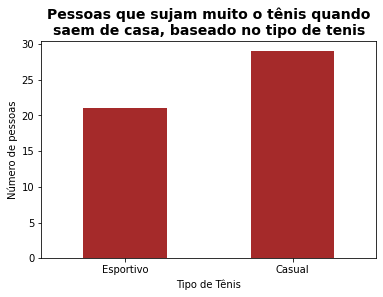

'Baseado nos dados, pessoas que usam tênis casual sujam mais'

In [50]:
shoes_type_agrupado = data.groupby(['ShoesType'])['DirtyShoes'].sum()

print(shoes_type_agrupado)

shoes_type_agrupado.plot.bar(color='brown')

plt.title('Pessoas que sujam muito o tênis quando\nsaem de casa, baseado no tipo de tenis', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Tênis')
plt.ylabel('Número de pessoas')

x_locs, x_labels = plt.xticks(np.arange(2), ['Esportivo', 'Casual'], rotation=0)

plt.show()

'''Baseado nos dados, pessoas que usam tênis casual sujam mais'''

WashShoes
0    11
1    39
Name: DirtyShoes, dtype: int64


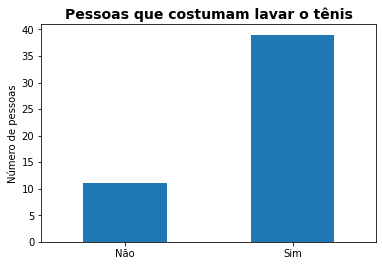

'A partir dos dados 78% das pessoas costumam lavar o tênis. Podemos concluir que uma sola removível facilitaria muito'

In [51]:
wash_dirtyshoes = data.groupby(['WashShoes'])['DirtyShoes'].sum()
print(wash_dirtyshoes)

wash_dirtyshoes.plot.bar()

plt.title('Pessoas que costumam lavar o tênis', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Número de pessoas')

x_locs, x_labels = plt.xticks(np.arange(2), ['Não', 'Sim'], rotation=0)


plt.show()

'''A partir dos dados 78% das pessoas costumam lavar o tênis. Podemos concluir que uma sola removível facilitaria muito'''

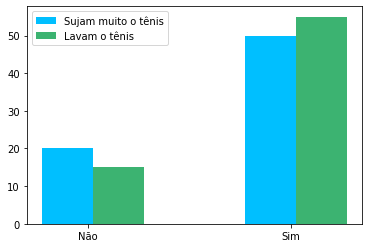

In [52]:
agrupado1 = data.groupby(['DirtyShoes']).size()
agrupado2 = data.groupby(['WashShoes']).size()

x1 = np.arange(len(agrupado1))
x2 = [x + 0.25 for x in x1]

plt.bar(x1, agrupado1, width=0.25, label='Sujam muito o tênis', color='deepskyblue')
plt.bar(x2, agrupado2, width=0.25, label='Lavam o tênis', color='mediumseagreen')

respostas = ['Não', 'Sim']
plt.xticks([x + 0.10 for x in range(len(agrupado1))], respostas)

plt.legend()

<AxesSubplot:xlabel='BuySustShoes'>

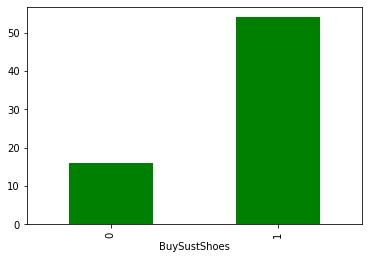

In [53]:
agrupado = data.groupby(['BuySustShoes']).size()
agrupado

agrupado.plot.bar(color='green')